# Project 4: Wage loss from Hurricane Harvey

# Table of Contents

1. [Imports](#imports)<br>
2. [Data Anlysis](#data)<br>
3. [Cleaning and adding features](#cleaning)<br>
4. [Further Data Analysis](#further)<br>
5. [Conclusion](#concl)<br>


# Imports <a name="imports"></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#bring in combined df
df = pd.read_csv('q2_q3_q4.csv')

# Data Analysis <a name="data"></a>

In [5]:
#check head
df.head()

,Unnamed: 0,Area Name,Average Weekly Wages,Employment,FIPS,Industry,No Of Establishments,On-Year Weekly Wages Gain/Loss (Percent),One-Year Employment Gain/Loss (Percent),Quarter
0,0,Anderson County,275.0,1666.0,48001.0,Leisure and Hospitality,109.0,1.1,3.1,Second Quarter
1,1,Andrews County,439.0,531.0,48003.0,Leisure and Hospitality,37.0,-0.9,17.5,Second Quarter
2,2,Angelina County,302.0,3549.0,48005.0,Leisure and Hospitality,157.0,-0.3,7.6,Second Quarter
3,3,Aransas County,335.0,1660.0,48007.0,Leisure and Hospitality,124.0,-0.9,6.8,Second Quarter
4,4,Archer County,222.0,60.0,48009.0,Leisure and Hospitality,8.0,-21.3,50.0,Second Quarter


Based on outside data, let's see if there is any relationship between hurricane strength and damages of hurricane.

In [ ]:
x=[5,5,4,4,3,3,2,1]
y=[14.9,116.9,62,25.9,10.8,73.5,1.3,26]
plt.scatter(x=[5,5,4,4,3,3,2,1], y=[14.9,116.9,62,25.9,10.8,73.5,1.3,26], s=300)
plt.ylabel('Damages ($B)', fontsize=17)
plt.xlabel('Hurricane Strength', fontsize=17)
plt.title('Hurricane Damages by Strength', fontsize=23)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

N = 8
data = [14.9,116.9,62,25.9,10.8,73.5,1.3,26]


plt.show()

There looks to be slight relationship, but not that strong. Thus it would not make sense to analyze multiple hurricanes by their category number.

Now we will add a column to categorize the counties that were impacted as a result of the hurricane based on https://www.fema.gov/disaster/4332

In [97]:
direct_affect = ['Aransas County', 'Austin County', 'Bastrop County',
                 'Bee County', 'Brazoria County', 'Caldwell County',
                 'Calhoun County', 'Chambers County', 'Colorado County',
                 'DeWitt County', 'Fayette County', 'Fort Bend County',
                 'Galveston County', 'Goliad County', 'Gonzales County', 
                 'Grimes County', 'Hardin County', 'Harris County',
                 'Jackson County', 'Jasper County', 'Jefferson County',
                 'Karnes County', 'Kleberg County', 'Lavaca County',
                 'Lee County', 'Liberty County', 'Matagorda County',
                 'Montgomery County', 'Newton County', 'Nueces County',
                 'Orange County', 'Polk County', 'Refugio County',
                 'Sabine County', 'San Jacinto County', 'San Patricio County',
                 'Tyler County', 'Victoria County', 'Walker County',
                 'Waller County', 'Wharton County']

In [98]:
#check how big
len(direct_affect)

41

In [99]:
#code to get other counties
list_of_counties = list(df['Area Name'].unique())

not_affect = [i for i in list_of_counties if i not in direct_affect]

Now let's add a new column to dataframe to distinguish the counties that were and were not affected.

In [100]:
#make dict to map to dataframe
dict1 = {}
for i in direct_affect:
    dict1[i] = 1
    

In [101]:
for i in not_affect:
    dict1[i] = 0

In [102]:
#make new column
df['Was it impacted?'] = df['Area Name'].map(dict1)

In [103]:
df['Was it impacted?'].value_counts()

0    6809
1    1345
Name: Was it impacted?, dtype: int64

In [104]:
1345/(6809+1345)

0.1649497179298504

About 16% of the counties were impacted as result of the hurricane.

Since we only have average wages and employment, let's multiply them to determine the total weekly value for each industry.

In [105]:
df['Weekly Economic Value'] = df['Employment'] * df['Average Weekly Wages']

In [106]:
#test output
df.head(20)

,Unnamed: 0,Area Name,Average Weekly Wages,Employment,FIPS,Industry,No Of Establishments,On-Year Weekly Wages Gain/Loss (Percent),One-Year Employment Gain/Loss (Percent),Quarter,Was it impacted?,Weekly Economic Value
0,0,Anderson County,275.0,1666.0,48001.0,Leisure and Hospitality,109.0,1.1,3.1,Second Quarter,0,458150.0
1,1,Andrews County,439.0,531.0,48003.0,Leisure and Hospitality,37.0,-0.9,17.5,Second Quarter,0,233109.0
2,2,Angelina County,302.0,3549.0,48005.0,Leisure and Hospitality,157.0,-0.3,7.6,Second Quarter,0,1071798.0
3,3,Aransas County,335.0,1660.0,48007.0,Leisure and Hospitality,124.0,-0.9,6.8,Second Quarter,1,556100.0
4,4,Archer County,222.0,60.0,48009.0,Leisure and Hospitality,8.0,-21.3,50.0,Second Quarter,0,13320.0
5,5,Armstrong County,291.0,25.0,48011.0,Leisure and Hospitality,3.0,NaN,NaN,Second Quarter,0,7275.0
6,6,Atascosa County,290.0,1273.0,48013.0,Leisure and Hospitality,90.0,7.4,11.8,Second Quarter,0,369170.0
7,7,Austin County,331.0,873.0,48015.0,Leisure and Hospitality,73.0,0.9,0.9,Second Quarter,1,288963.0
8,8,Bailey County,265.0,239.0,48017.0,Leisure and Hospitality,16.0,3.1,8.6,Second Quarter,0,63335.0
9,9,Bandera County,347.0,674.0,48019.0,Leisure and Hospitality,57.0,2.7,15.2,Second Quarter,0,233878.0


# Cleaning and Adding Features <a name="cleaning"></a>

We have an extra column, we will remove.

In [107]:
df.drop(columns='Unnamed: 0', inplace=True)

In [108]:
df.head()

,Area Name,Average Weekly Wages,Employment,FIPS,Industry,No Of Establishments,On-Year Weekly Wages Gain/Loss (Percent),One-Year Employment Gain/Loss (Percent),Quarter,Was it impacted?,Weekly Economic Value
0,Anderson County,275.0,1666.0,48001.0,Leisure and Hospitality,109.0,1.1,3.1,Second Quarter,0,458150.0
1,Andrews County,439.0,531.0,48003.0,Leisure and Hospitality,37.0,-0.9,17.5,Second Quarter,0,233109.0
2,Angelina County,302.0,3549.0,48005.0,Leisure and Hospitality,157.0,-0.3,7.6,Second Quarter,0,1071798.0
3,Aransas County,335.0,1660.0,48007.0,Leisure and Hospitality,124.0,-0.9,6.8,Second Quarter,1,556100.0
4,Archer County,222.0,60.0,48009.0,Leisure and Hospitality,8.0,-21.3,50.0,Second Quarter,0,13320.0


# Further Data Analysis <a name="further"></a>

Let's take a look at which industries were most impacted, as defined by most amount of weekly economic value lost.

In [109]:
table = pd.pivot_table(df, values='Employment', index=['Industry'], columns=['Quarter'], aggfunc=np.sum)

In [110]:
table['Difference'] = table['Third Quarter'] - table['Second Quarter']

In [111]:
table.sort_values(by = 'Difference')

Quarter,Fourth Quarter,Second Quarter,Third Quarter,Difference
Industry,,,,
Leisure and Hospitality,1307430.0,1350777.0,1311788.0,-38989.0
Other Services,322341.0,328494.0,322443.0,-6051.0
Construction,699378.0,698628.0,693766.0,-4862.0
Information,192351.0,193639.0,189323.0,-4316.0
Manufacturing,845373.0,838260.0,838989.0,729.0
"Trade,Transportation, and Utilities",2451244.0,2351375.0,2352115.0,740.0
Education and Health Services,1612553.0,1597333.0,1598115.0,782.0
Unclassified,12403.0,9535.0,10848.0,1313.0
Financial Activities,723964.0,716574.0,719789.0,3215.0


Leisure and hospitality was hurt the most, losing almost 40K workers. This makes sense since in a time of crisis, people likely won't have time or money to spend on recreational activities, thus resulting in less employees. <br>

It is interesting that some industries saw *increases* in employment after the hurricane, particularly Professional and Business Services.

So that summarizes the industries at an employment level, but what about wages?

In [112]:
table = pd.pivot_table(df, values='Weekly Economic Value', index=['Industry'], columns=['Quarter'], aggfunc=np.sum)

In [113]:
diff_df = pd.DataFrame(table)

In [114]:
diff_df['Difference'] = diff_df['Third Quarter'] - diff_df['Second Quarter']

In [115]:
diff_df['Diff Percentage'] = diff_df['Difference'] / diff_df['Second Quarter']

In [116]:
df_sorted_by_diff = diff_df.sort_values(by='Difference', ascending=True)

In [141]:
df_sorted_by_diff

Quarter,Fourth Quarter,Second Quarter,Third Quarter,Difference,Diff Percentage
Industry,,,,,
Education and Health Services,1.547016e+09,1.432776e+09,1.414001e+09,-18775265.0,-0.013104
Construction,9.217212e+08,8.175273e+08,8.054290e+08,-12098305.0,-0.014799
Leisure and Hospitality,5.520103e+08,5.407083e+08,5.296090e+08,-11099310.0,-0.020527
Manufacturing,1.243734e+09,1.161630e+09,1.151652e+09,-9977551.0,-0.008589
Financial Activities,1.117233e+09,9.999778e+08,9.919718e+08,-8005995.0,-0.008006
"Trade,Transportation, and Utilities",2.346717e+09,2.142298e+09,2.137561e+09,-4736870.0,-0.002211
Other Services,2.442335e+08,2.300305e+08,2.273139e+08,-2716590.0,-0.011810
Information,3.004403e+08,2.890702e+08,2.890399e+08,-30302.0,-0.000105
Unclassified,9.256046e+06,6.352795e+06,8.364953e+06,2012158.0,0.316736


Despite Leisure and Hospitality losing the most workers, the Education and Health Services industry actually suffered the most economic loss. Again professional and business services saw an increase, and the same is true of natural resources/mining.

Let's plot this to see if anything else jumps out.

In [143]:
#get list of industries
list_of_ind = ['Education and Health Services', 'Construction',
       'Leisure and Hospitality', 'Manufacturing', 'Financial Activities',
       'Trade,Transportation, and Utilities', 'Other Services', 'Information',
       'Unclassified', 'Natural Resources and Mining',
       'Professional and Business Services']

In [323]:
q2_list = list(df_sorted_by_diff['Second Quarter']/1000000)


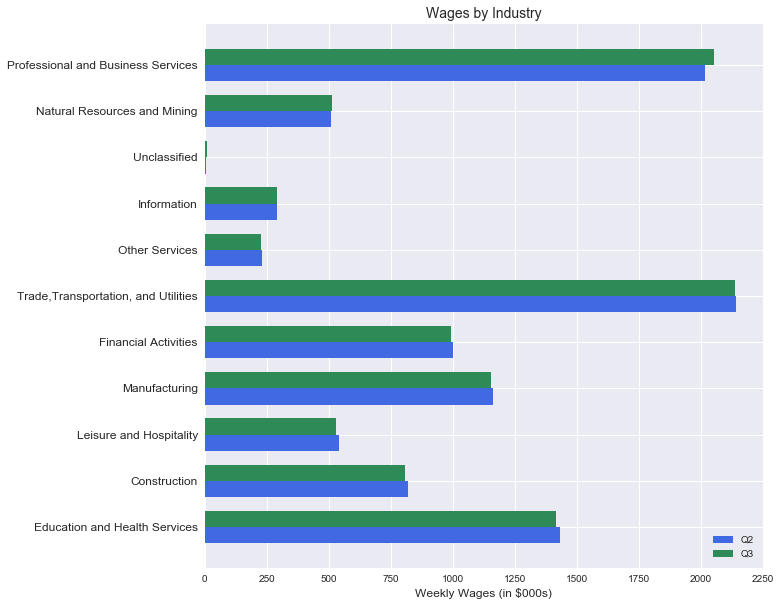

In [325]:
#https://stackoverflow.com/questions/51610707/two-stacked-bar-charts-as-sub-plots-any-references
N = 11

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
rects1 = ax.barh(ind, q2_list, width, color='royalblue',)

q3_list = list(df_sorted_by_diff['Third Quarter']/1000000)

rects2 = ax.barh(ind+width, q3_list, width, color='seagreen',)

# add some
ax.set_xlabel('Weekly Wages (in $000s)', fontsize=12)
ax.set_title('Wages by Industry', fontsize=14)
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(list_of_ind, fontsize=12 )
ax.legend( (rects1[0], rects2[0]), ('Q2', 'Q3') )

plt.show()

Overall, this plot shows the industries were not that different before and after the hurricane. This is not exactly what was expected. Perhaps if we look at counties that were impacted, the story is different.

In [130]:
table2.columns

MultiIndex(levels=[['Employment'], ['Fourth Quarter', 'Second Quarter', 'Third Quarter']],
           labels=[[0, 0, 0], [0, 1, 2]],
           names=[None, 'Quarter'])

In [128]:
table2.index

Index(['Construction', 'Education and Health Services', 'Financial Activities',
       'Information', 'Leisure and Hospitality', 'Manufacturing',
       'Natural Resources and Mining', 'Other Services',
       'Professional and Business Services',
       'Trade,Transportation, and Utilities', 'Unclassified'],
      dtype='object', name='Industry')

Here we will look at only the counties that received aid from the hurricane and see if there are any trends.

In [2]:
#create piv table
impacted_table = pd.pivot_table(df, values='Weekly Economic Value', index=['Was it impacted?'], columns=['Quarter'], aggfunc=np.sum)




NameError: name 'pd' is not defined

In [194]:
impacted_df = pd.DataFrame(impacted_table)

In [195]:
#calculate differences
impacted_df['Third Quarter'] = impacted_df['Third Quarter'] / 1000000
impacted_df['Second Quarter'] = impacted_df['Second Quarter'] / 1000000
impacted_df['Fourth Quarter'] = impacted_df['Fourth Quarter'] / 1000000

In [196]:
impacted_df['Difference'] = impacted_df['Third Quarter'] - impacted_df['Second Quarter']

In [197]:
impacted_df['Difference_Percentage'] = impacted_df['Difference'] / impacted_df['Second Quarter']

In [198]:
impacted_df

Quarter,Fourth Quarter,Second Quarter,Third Quarter,Difference,Difference_Percentage
Was it impacted?,,,,,
0,7383.240503,6719.628834,6708.581931,-11.046903,-0.001644
1,3782.059878,3425.217423,3410.430834,-14.786589,-0.004317


Let's plot this again to see if anything jumps out.

In [277]:
non_impacted_data = [6719.628834, 6708.581931, 7383.240503]

In [278]:
impacted_data = [3425.217423, 3410.430834, 3782.059878]

In [279]:
#convert weekly wages to quarterly
fourth_q = [7383.240503*13, 3782.059878*13]

third_q = [6708.581931*13, 3410.430834*13]

second_q = [6719.628834*13, 3425.217423*13]

In [317]:
#calculate percentage change
non_impact_change = (third_q[0] - second_q[0]) / second_q[0]
impact_change = (third_q[1] - second_q[1]) / second_q[1]

#print %
print(impact_change)
print(non_impact_change)

non_impact_change_fourth = (fourth_q[0] - third_q[0]) / third_q[0]
impact_change_fourth = (fourth_q[1] - third_q[1]) / third_q[1]

print(impact_change_fourth)
print(non_impact_change_fourth)

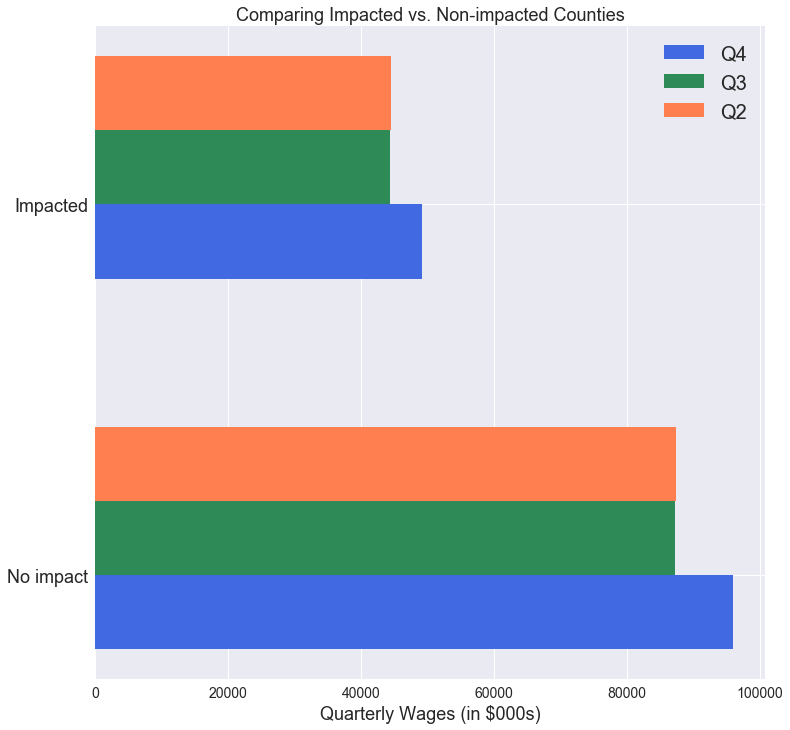

In [373]:
#https://stackoverflow.com/questions/51610707/two-stacked-bar-charts-as-sub-plots-any-references
N = 2

ind = np.arange(N)  # the x locations for the groups
width = 0.2     # the width of the bars

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
rects1 = ax.barh(ind, fourth_q, width, color='royalblue',)




rects2 = ax.barh(ind+width, third_q, width, color='seagreen',)
rects3 = ax.barh(ind+width+width, second_q, width, color='coral',)


# add some
#plt.ylim((2000, 75000))  
ax.set_xlabel('Quarterly Wages (in $000s)', fontsize=18)
ax.set_title('Comparing Impacted vs. Non-impacted Counties', fontsize=18)
ax.set_yticks(ind + width / 2)
plt.xticks(fontsize=14, )
ax.set_yticklabels(['No impact','Impacted'], fontsize=18,  )
ax.legend( (rects1[0], rects2[0],rects3[0]), ('Q4', 'Q3','Q2'), fontsize=20 )

plt.show()

This again does not meet out expectations. Although the counties that were impacted did see a larger decrease from Q2-Q3, both groups of counties jumped right back up in Q4. Thus, it is possible the larger decrease from Q2-Q3 was driven by random variation and may not be related to the hurricane at all.

# Conclusions and Recommendations <a name="concl"></a>

Despite our shortcomings in generating a working model, we did uncover some interesting short term trends in the aftermath of Hurricane Harvey. Interestingly, certain industries experienced wage increases while most others suffered. For example, the Mining and Professional Services industries both saw gains of approximately 1.7%, while other industries such as Education and Health Services saw a drop in weekly wages of 1.3%. Harris County was one of the most impacted, as they bore the brunt of the losses in both Construction as well as Leisure and Hospitality ($10 million and $2 million, respectively).

As we transitioned from predicting the economic losses to analyzing Harvey, we did outside research on historical hurricanes’ strength in Category ranking and their associated normalized economic impact. What we found was that there is an extremely large amount of variance in the economic losses sustained by hurricane-hit locations. As discussed prior, we believe that this is directly impacted by not only the strength of the hurricane, but also the amount of rain, geographic location, industries affected and finally population size and density. 

In attempting to build a predictive model, we recommend obtaining more granular data from other hurricanes, in regards to timeframe and storm details such as quantified wind and rain measurements. Ideally it would consist of all the available data for all known hurricanes, not limited to the US. Additionally, we theorized that clustering the locations prone to hurricanes would yield more actionable information. In total, this equates to nearly an entire overhaul of the current hurricane measurement system, which we believe to be severely lacking in its singular measurement of peak sustained wind speed.
